<a href="https://colab.research.google.com/github/JingfengSteven/NAM_trail/blob/trail_1/givemesomecredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/JingfengSteven/givemesomecredit

Cloning into 'givemesomecredit'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), 4.39 MiB | 3.46 MiB/s, done.


In [3]:
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
from givemesomecredit import models as nam_models
from givemesomecredit import graph_builder
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn

##data processing

In [5]:
orgdata=pd.read_csv("givemesomecredit/cs-training.csv")
orgdata=orgdata.dropna(axis=0)
orgdata.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
class1=orgdata[orgdata['SeriousDlqin2yrs'] == 1]
class0=orgdata[orgdata['SeriousDlqin2yrs'] == 0]
class0=class0[0:5000]
class1=class1[0:5000]
data=pd.concat([class0,class1],axis=0)
data=np.array(data)
x=data[:,2:12]
y=data[:,1]
x_train=x
y_train=y
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
X_train, X_test, Y_train, Y_test = train_test_split(
      x_train, y_train, test_size=0.33, random_state=42)

##build the model

In [9]:
tf.compat.v1.reset_default_graph()
nn_model = graph_builder.create_nam_model(
    x_train=X_train,
    dropout=0.0,
    num_basis_functions=1,
    activation='relu',
    trainable=True,
    shallow=False,
    name_scope='model_0')
_ = nn_model(X_train[:])
nn_model.summary()

Model: "nam"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_nn (FeatureNN)      multiple                  142       
                                                                 
 feature_nn_1 (FeatureNN)    multiple                  142       
                                                                 
 feature_nn_2 (FeatureNN)    multiple                  142       
                                                                 
 feature_nn_3 (FeatureNN)    multiple                  142       
                                                                 
 feature_nn_4 (FeatureNN)    multiple                  142       
                                                                 
 feature_nn_5 (FeatureNN)    multiple                  142       
                                                                 
 feature_nn_6 (FeatureNN)    multiple                  142     

In [12]:
nn_model.compile(loss=CustomAccuracy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics='AUC')

training_callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(patience = 20, factor = 0.1, min_lr = 0.0001, verbose = 1),
    tf.keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True),
]

nn_model.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100


KeyboardInterrupt: ignored

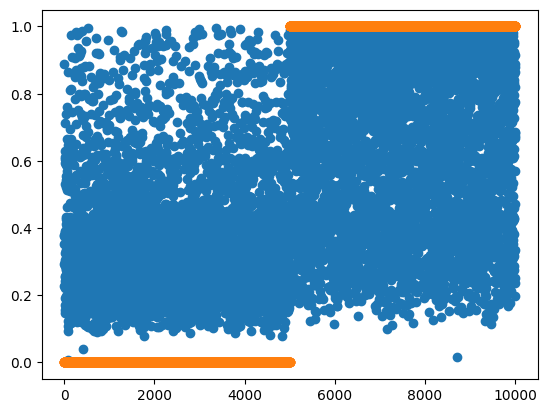

In [71]:
y_pred=np.array(nn_model(x_train[:]))
x=np.arange(10000)
plt.scatter(x,y_pred)
plt.scatter(x,y_train)  

In [13]:
#y_pred=np.array(nn_model(x_train[:]))
for i in range(3300):
  if (y_pred[i]>=0.5):
    y_pred[i]=1
  else:
    y_pred[i]=0
print("the binary accuracy is:")
print((3300-sum(abs(y_pred-Y_test)))/3300)


NameError: ignored